In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


In [2]:
load_dotenv()

True

In [3]:
model=ChatOpenAI()

In [4]:
class BlogState(TypedDict):
    title:str
    outline:str
    content:str
    

In [5]:
def create_outline(state:BlogState)->BlogState:
    title=state['title']
    prompt=f"Create a detailed outline for a blog post with the title: {title}"
    outline=model.invoke(prompt).content
    state['outline']=outline
    return state
    

def write_content(state:BlogState)->BlogState:
    title=state['title']
    outline=state['outline']
    prompt=f"Write a blog post with the title: {title} and the following outline: {outline}"
    content=model.invoke(prompt).content
    state['content']=content
    return state

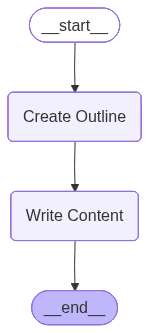

In [6]:
graph=StateGraph(BlogState)

graph.add_node("Create Outline",create_outline)
graph.add_node("Write Content",write_content)


graph.add_edge(START ,"Create Outline" )
graph.add_edge("Create Outline","Write Content")
graph.add_edge("Write Content",END)

workflow=graph.compile()

workflow 

In [7]:
initial_state={'title':'Indian Philosophy'}
final_state=workflow.invoke(initial_state)

In [9]:
print(final_state)

{'title': 'Indian Philosophy', 'outline': "I. Introduction\n    A. Brief explanation of Indian philosophy\n    B. Importance of Indian philosophy in the world of philosophy\n    \nII. Overview of Indian Philosophical Traditions\n    A. Introduction to the six orthodox schools of Indian philosophy (Nyaya, Vaisheshika, Samkhya, Yoga, Mimamsa, Vedanta)\n    B. Brief explanation of the heterodox schools (Jainism, Buddhism, Charvaka)\n    \nIII. Key Concepts in Indian Philosophy\n    A. Dharma and karma\n    B. Moksha and samsara\n    C. Atman and Brahman\n    D. Maya and avidya\n    E. Ahimsa and non-violence\n\nIV. Influence of Indian Philosophy on Western Philosophy\n    A. Introduction to the impact of Indian philosophy on Western thought\n    B. Notable philosophers influenced by Indian philosophy (such as Schopenhauer and Emerson)\n    \nV. Contemporary Relevance of Indian Philosophy\n    A. Application of Indian philosophical concepts in daily life\n    B. Integration of Indian philo

In [11]:
print(final_state['outline'])

I. Introduction
    A. Brief explanation of Indian philosophy
    B. Importance of Indian philosophy in the world of philosophy
    
II. Overview of Indian Philosophical Traditions
    A. Introduction to the six orthodox schools of Indian philosophy (Nyaya, Vaisheshika, Samkhya, Yoga, Mimamsa, Vedanta)
    B. Brief explanation of the heterodox schools (Jainism, Buddhism, Charvaka)
    
III. Key Concepts in Indian Philosophy
    A. Dharma and karma
    B. Moksha and samsara
    C. Atman and Brahman
    D. Maya and avidya
    E. Ahimsa and non-violence

IV. Influence of Indian Philosophy on Western Philosophy
    A. Introduction to the impact of Indian philosophy on Western thought
    B. Notable philosophers influenced by Indian philosophy (such as Schopenhauer and Emerson)
    
V. Contemporary Relevance of Indian Philosophy
    A. Application of Indian philosophical concepts in daily life
    B. Integration of Indian philosophy in modern psychology and mindfulness practices
    
VI. Cr